# Class 10

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

In [2]:
df = pd.read_csv("/kaggle/input/123qweasd/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.drop("CustomerID", axis=1, inplace=True)

In [6]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.rename(columns={'Annual Income (k$)':'income','Age':'age','Spending Score (1-100)':'score'},inplace=True)

In [8]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Visualization

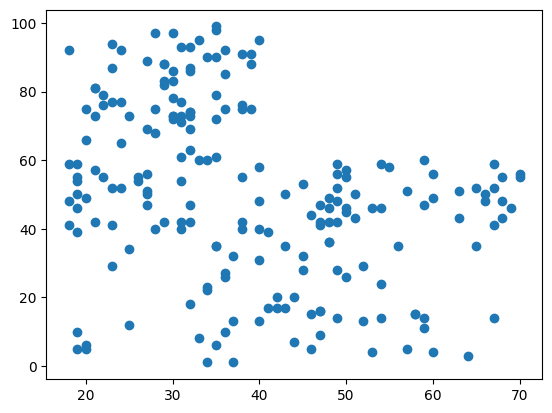

In [9]:
plt.scatter(df.age, df.score)

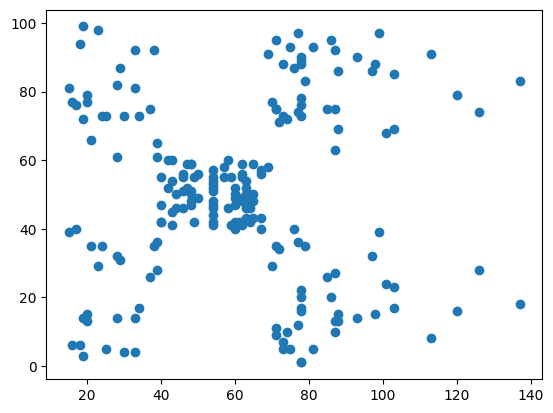

In [10]:
plt.scatter(df.income, df.score)

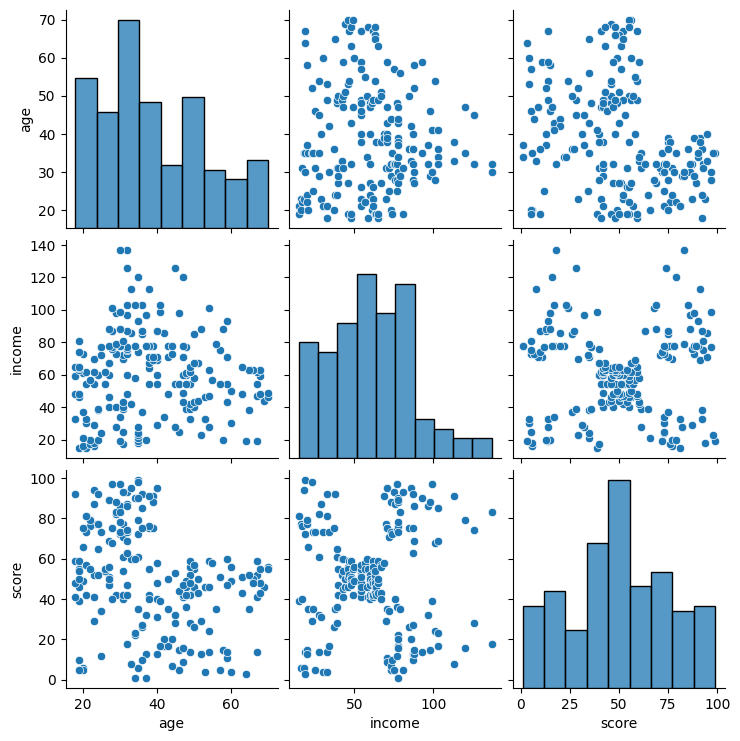

In [11]:
sns.pairplot(df[["age",'income','score']])
# shows all the relationships via graphs

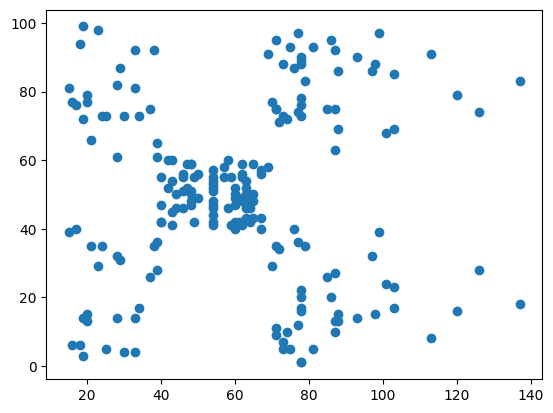

In [12]:
plt.scatter(df.income, df.score)

### Income and Score

In [13]:
import sklearn.cluster as cluster

In [14]:
kmeans1 = cluster.KMeans()

In [15]:
kmeans1.fit(df[['income','score']])

KMeans()

In [16]:
kmeans1.predict(df[['income','score']])

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 7, 0, 7, 6, 7, 6, 7,
       0, 7, 6, 7, 6, 7, 6, 7, 6, 7, 0, 7, 6, 7, 0, 7, 6, 7, 6, 7, 6, 7,
       6, 7, 6, 7, 6, 7, 0, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7, 6, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [17]:
df["pred cluster"]=kmeans1.predict(df[['income','score']])

In [18]:
df.head()

,Gender,age,income,score,pred cluster
0,Male,19,15,39,4
1,Male,21,15,81,5
2,Female,20,16,6,4
3,Female,23,16,77,5
4,Female,31,17,40,4


In [19]:
center1 = kmeans1.cluster_centers_

In [20]:
center1

array([[ 63.80952381,  47.66666667],
       [ 47.06818182,  50.36363636],
       [109.7       ,  22.        ],
       [108.18181818,  82.72727273],
       [ 25.14285714,  19.52380952],
       [ 25.0952381 ,  80.04761905],
       [ 79.73913043,  13.39130435],
       [ 78.03571429,  81.89285714]])

## Visuals

In [21]:
df1 = df[df['pred cluster'] == 0]
df2 = df[df['pred cluster'] == 1]
df3 = df[df['pred cluster'] == 2]
df4 = df[df['pred cluster'] == 3]
df5 = df[df['pred cluster'] == 4]
df6 = df[df['pred cluster'] == 5]
df7 = df[df['pred cluster'] == 6]
df8 = df[df['pred cluster'] == 7]

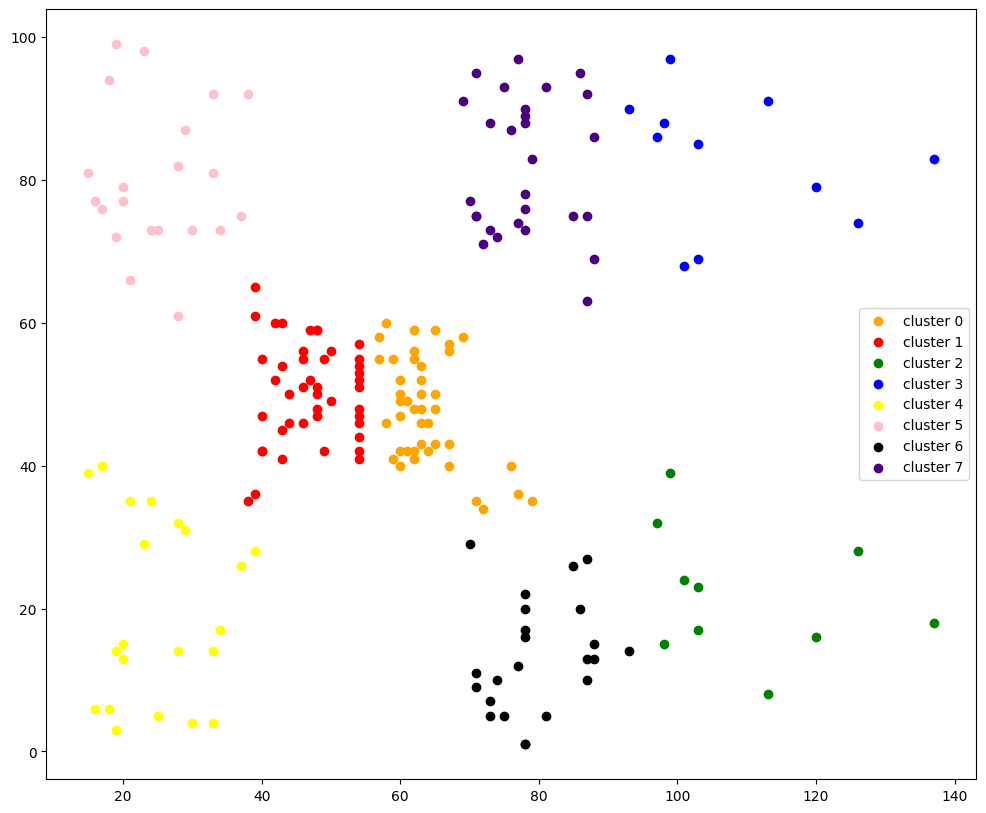

In [22]:
plt.figure(figsize=(12,10))
plt.scatter(df1['income'],df1['score'],color='orange',label='cluster 0')
plt.scatter(df2['income'],df2['score'],color='red',label='cluster 1')
plt.scatter(df3['income'],df3['score'],color='green',label='cluster 2')
plt.scatter(df4['income'],df4['score'],color='blue',label='cluster 3')
plt.scatter(df5['income'],df5['score'],color='yellow',label='cluster 4')
plt.scatter(df6['income'],df6['score'],color='pink',label='cluster 5')
plt.scatter(df7['income'],df7['score'],color='black',label='cluster 6')
plt.scatter(df8['income'],df8['score'],color='indigo',label='cluster 7')
plt.legend()

## Tuning

In [23]:
from sklearn.cluster import KMeans

In [24]:
wcss = []

clusters=range(1,16)

for k in clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['score','income']])
    wcss.append(kmeans.inertia_)  # sum of the squared distances

In [25]:
wcss

[269981.2800000001,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30227.606513152015,
 25011.839349156595,
 21826.936303231654,
 19787.670554966855,
 17586.632447340515,
 16049.714149902386,
 14271.670282658517,
 13093.292080688076,
 11650.45228545964]

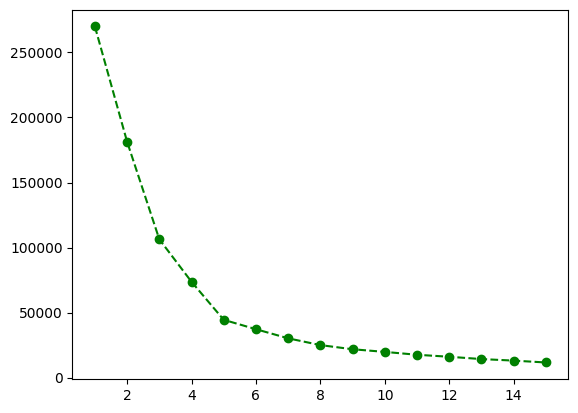

In [26]:
plt.plot(clusters,wcss,'go--')

In [27]:
#from kneed import KneeLocator

## K=5, Cluster=5

In [28]:
kmeans2 = cluster.KMeans(n_clusters=5)

In [29]:
kmeans2

KMeans(n_clusters=5)

In [30]:
kmeans2.fit_predict(df[['income','score']])

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [31]:
df["new_cluster"] = kmeans2.fit_predict(df[['income','score']])

In [32]:
df.head()

,Gender,age,income,score,pred cluster,new_cluster
0,Male,19,15,39,4,3
1,Male,21,15,81,5,4
2,Female,20,16,6,4,3
3,Female,23,16,77,5,4
4,Female,31,17,40,4,3


In [33]:
df1 = df[df['new_cluster'] == 0]
df2 = df[df['new_cluster'] == 1]
df3 = df[df['new_cluster'] == 2]
df4 = df[df['new_cluster'] == 3]
df5 = df[df['new_cluster'] == 4]

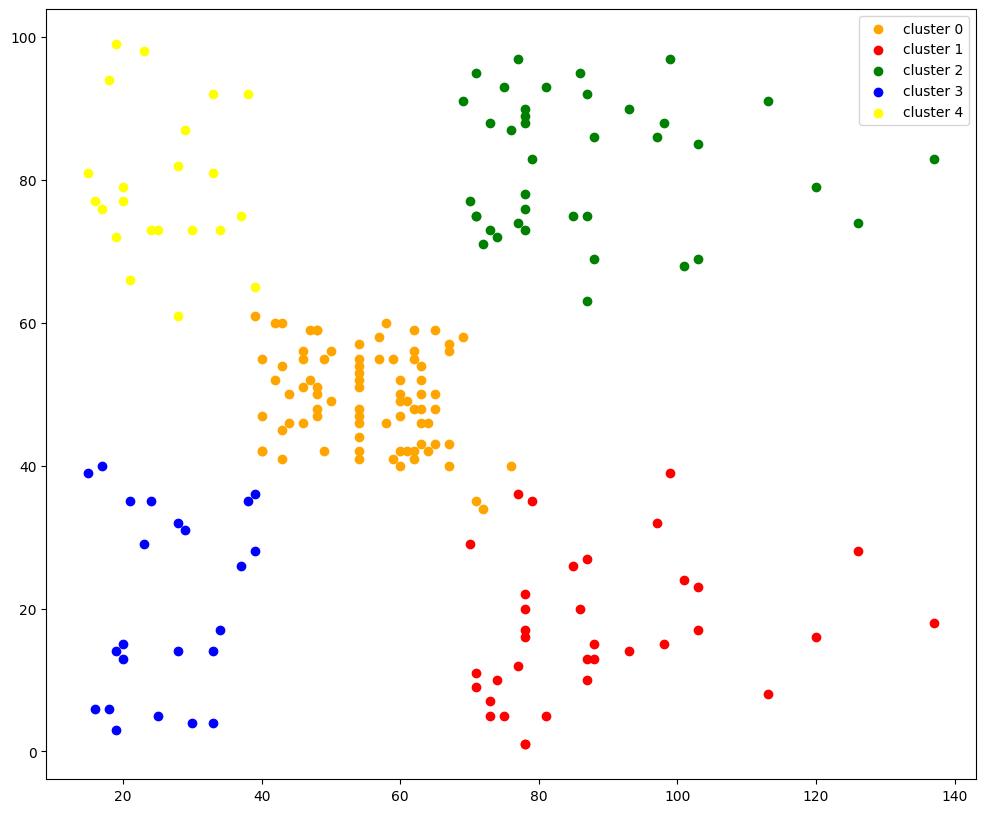

In [34]:
plt.figure(figsize=(12,10))
plt.scatter(df1['income'],df1['score'],color='orange',label='cluster 0')
plt.scatter(df2['income'],df2['score'],color='red',label='cluster 1')
plt.scatter(df3['income'],df3['score'],color='green',label='cluster 2')
plt.scatter(df4['income'],df4['score'],color='blue',label='cluster 3')
plt.scatter(df5['income'],df5['score'],color='yellow',label='cluster 4')
plt.legend()

In [35]:
center2 = kmeans2.cluster_centers_

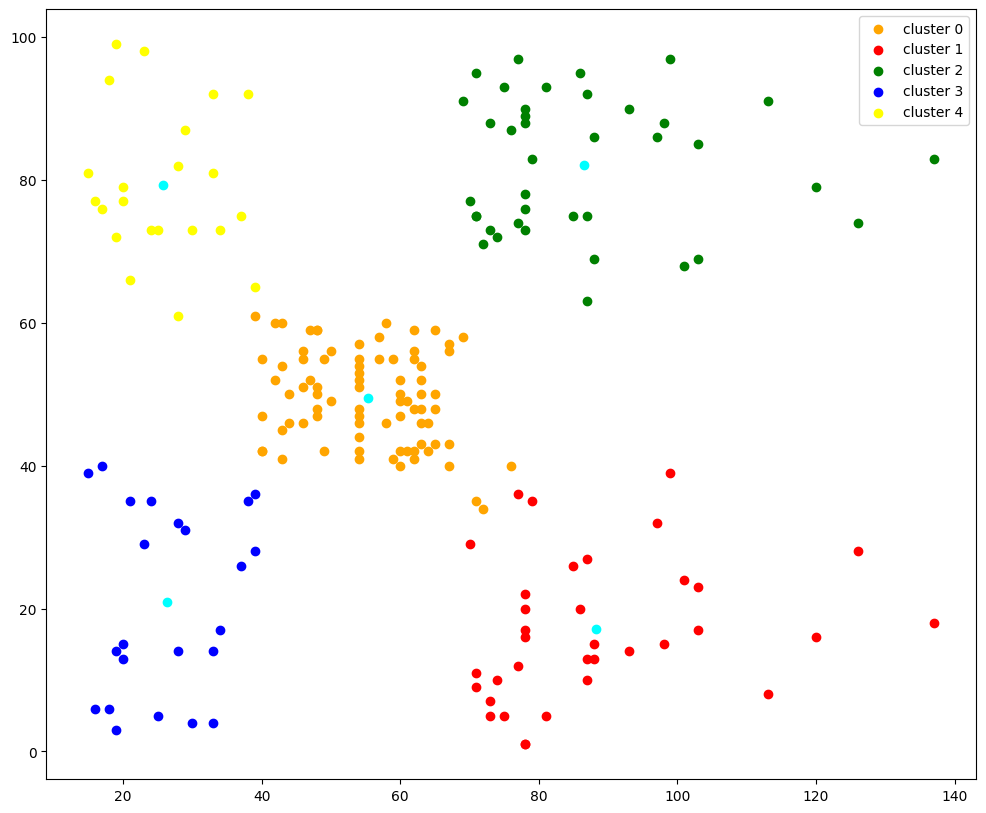

In [36]:
plt.figure(figsize=(12,10))
plt.scatter(df1['income'],df1['score'],color='orange',label='cluster 0')
plt.scatter(df2['income'],df2['score'],color='red',label='cluster 1')
plt.scatter(df3['income'],df3['score'],color='green',label='cluster 2')
plt.scatter(df4['income'],df4['score'],color='blue',label='cluster 3')
plt.scatter(df5['income'],df5['score'],color='yellow',label='cluster 4')

plt.scatter(center2[:,0],center2[:,1],color='cyan')
# first is all row and first column(0) second in all row secons column(1)

plt.legend()